# <u>Subreddit prediction</u> #



## 1. Description of the project ##

### <span style="color: #FF9800;">Project overview </span> ###


This project aims to develop machine learning models for **analyzing Reddit text** to determine the origin subreddit of a given post or comment. Reddit, a popular social media platform, is organized into a variety of thematic communities known as *subreddits*, where users share content and engage in discussions.



### <span style="color: #FF9800;">Objective </span> ###


The primary objective is to build a model that can **predict the subreddit** of a Reddit post or comment. Given a text entry from Reddit, the model will identify which of the following subreddits it originally came from:

- **Toronto**
- **Brussels**
- **London**
- **Montreal**

<b>This defines a multiclass classification problem</b>


### <span style="color: #FF9800;">Approach</span> ###



This project consists of two main parts:

1. **Implement a Bernoulli Naïve Bayes Classifier from Scratch**  
   First, a Bernoulli Naïve Bayes classifier will be developed from the ground up, without relying on external libraries for the core algorithm. This implementation will provide a deeper understanding of how the Bernoulli Naïve Bayes method works and how it can be applied to text classification.

2. **Utilize a Classifier from Scikit-Learn**  
   In the second part, a pre-built classifier from the `scikit-learn` library will be used to perform the same task. This comparison will allow us to evaluate the effectiveness of our custom implementation against a widely used, optimized machine learning library.


## 2. Load dataset and modules ##

### <span style="color: #FF9800;">Module importation </span> ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Ensure required NLTK resources are downloaded
try:
    nltk.download('punkt')
    nltk.download('stopwords')
except Exception as e:
    print(f"Error downloading NLTK resources: {e}")


[nltk_data] Downloading package punkt to /home/clatimie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/clatimie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <span style="color: #FF9800;">Load training dataset</span> ###

In [2]:
# Define the path to the training data file
path_training = "../datasets/Train.csv"

# Read the CSV file into a pandas DataFrame
training_data = pd.read_csv(path_training, delimiter=',')

# Set column names explicitly for better readability
training_data.columns = ['text', 'subreddit']

# Separate the training data into two series: texts and subreddit labels
texts_train = training_data['text']          # Contains the Reddit posts or comments
subreddits_train = training_data['subreddit'] # Contains the subreddit each post originates from

# Get unique subreddit labels
unique_labels = np.unique(subreddits_train)   # List of unique subreddits in the dataset

n_samples_training = texts_train.shape[0]
n_classes = unique_labels.shape[0]

print(f"Training dataset has {n_samples_training} examples and there are {n_classes} classes")

Training dataset has 1399 examples and there are 4 classes


### <span style="color: #FF9800;">Inspect training dataset</span> ###

<Axes: title={'center': 'Label Distribution in the training dataset'}, xlabel='subreddit'>

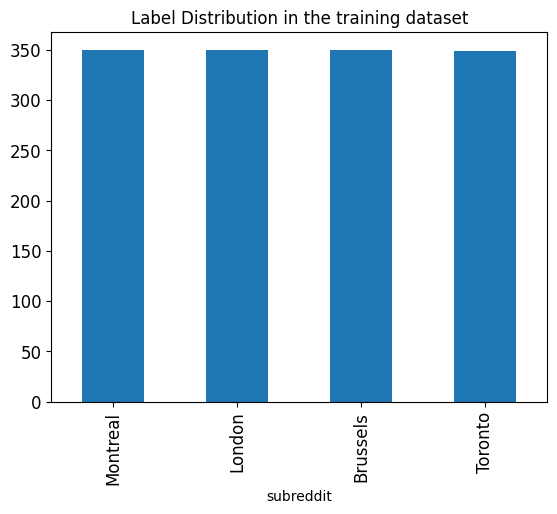

In [ ]:
# Create a DataFrame
df = pd.DataFrame(training_data)
# Count the number of samples for each label
label_counts = df['subreddit'].value_counts()
# Plot the distribution
label_counts.plot(kind='bar', title='Label Distribution in the training dataset', fontsize=12)



### <span style="color: #FF9800;">Load test dataset</span> ###

In [4]:
# Define the path to the training data file
path_test = "../datasets/Test.csv"

# Read the CSV file into a pandas DataFrame
texts_test = pd.read_csv(path_test, delimiter=',')["body"]

n_samples_test = texts_test.shape[0]
print(f"Test dataset has {n_samples_test} examples")


Test dataset has 600 examples


## 3. Vectorization of the texts ##

To utilize the texts in machine learning models, it is essential to convert them into a vectorized format. There are several methods available for encoding texts as vectors.

1. **Binary Representation of Words**  
   One approach is to employ a binary representation of the words. This method indicates the presence or absence of each word in the text using binary values (1 or 0).

2. **Removal of Stop Words**  
   Additionally, it is important to consider the removal of stop words—common words such as "and," "the," or "is" that may not carry significant meaning in the context of the analysis. By eliminating these words, we can enhance the quality of our feature set.

3. **TF-IDF (Term Frequency-Inverse Document Frequency)**  
   Another effective technique for vectorization is the use of TF-IDF. This method not only accounts for the frequency of words in the text but also adjusts for their importance across the entire corpus. By selecting features based on TF-IDF scores, we can focus on the most relevant words for our machine learning models.


In [5]:
class StemTokenizer:
            def __init__(self, stopwords_list):
                # Initialize the Porter Stemmer
                self.wnl = nltk.stem.PorterStemmer()
                self.stop_words = stopwords_list

            def __call__(self, doc):
                # Tokenize the document and stem each token, filtering out non-alpha and stop words
                return [self.wnl.stem(t) for t in word_tokenize(doc) if t.isalpha() and t not in self.stop_words]

In [6]:
class Vectorizer:
    def __init__(self, method,isTraining,threshold=None, stopwords_list=None):
        self.method = method
        self.isTraining = isTraining
        self.vectorizer = None
        self.threshold = threshold 
        self.stopwords = stopwords_list
    
    def change_mode(self):
        if self.isTraining==True:
            self.isTraining=False
        else:
            self.isTraining=True

    def vectorize(self, texts):
        if self.method == "binary":
            if self.isTraining : 
                return self.BinaryVectorizer(texts)
            else:
                # Just transform the data if in testing mode
                x_test= self.vectorizer.transform(texts)
                print(f"Binary vectorized test dataset has {x_test.shape[0]} samples and {x_test.shape[1]} features")
                return x_test
        elif self.method == "binaryANDstopwords":
            if self.isTraining : 
                return self.BinaryVectorizerANDstopwords(texts)
            else:
                # Just transform the data if in testing mode
                x_test= self.vectorizer.transform(texts)
                print(f"Binary vectorized test dataset (WITH stop words consideration) has {x_test.shape[0]} samples and {x_test.shape[1]} features")
                return x_test
        elif self.method == "binaryANDstopwordsANDstemming":
            if self.isTraining:
                return self.BinaryVectorizerANDstopwordsANDstemming(texts)
            else:
                # Just transform the data if in testing mode
                x_test= self.vectorizer.transform(texts)
                print(f"Binary vectorized test dataset (WITH stop words consideration AND stemming) has {x_test.shape[0]} samples and {x_test.shape[1]} features")
                return x_test
        elif self.method == "binaryANDstopwordsANDstemmingANDtfidf":
            if self.isTraining:
                return self.BinaryVectorizerANDstopwordsANDstemmingANDtfidf(texts)
            else:
                # Just transform the data if in testing mode
                x_test= self.vectorizer.transform(texts)
                print(f"Binary vectorized test dataset (WITH stop words consideration and STEMMING and TFIDF based token selection [thresold = {self.threshold}]) has {x_test.shape[0]} examples and {x_test.shape[1]} features")
                return x_test
    
    def BinaryVectorizer(self, texts):
        self.vectorizer = CountVectorizer(binary=True)
        x_train = self.vectorizer.fit_transform(texts)
        n_samples = x_train.shape[0]  # Number of samples
        print(f"Binary vectorized training dataset has {n_samples} examples and {x_train.shape[1]} features")
        return x_train
    
    def BinaryVectorizerANDstopwords(self, texts):
        self.vectorizer = CountVectorizer(binary=True, stop_words=self.stopwords)
        x_train = self.vectorizer.fit_transform(texts)
        n_samples = x_train.shape[0]  # Number of samples
        print(f"Binary vectorized training dataset (WITH stop words consideration) has {n_samples} examples and {x_train.shape[1]} features")
        return x_train
    
    def BinaryVectorizerANDstopwordsANDstemming(self, texts):
        class StemTokenizer:
            def __init__(self, stop_words):
                # Initialize the Porter Stemmer
                self.wnl = nltk.stem.PorterStemmer()
                self.stop_words = stop_words  

            def __call__(self, doc):
                # Tokenize the document and stem each token, filtering out non-alpha and stop words
                return [self.wnl.stem(t) for t in word_tokenize(doc) if t.isalpha() and t not in self.stop_words]

        # Set up the CountVectorizer with binary representation, stop words, and stemming
        self.vectorizer = CountVectorizer(
            binary=True,
            tokenizer=StemTokenizer(self.stopwords),
            stop_words=self.stopwords
        )
        x_train = self.vectorizer.fit_transform(texts)
        n_samples = x_train.shape[0]  # Number of samples
        print(f"Binary vectorized training dataset (WITH stop words consideration and STEMMING) has {n_samples} examples and {x_train.shape[1]} features")
        return x_train

    def BinaryVectorizerANDstopwordsANDstemmingANDtfidf(self, texts):
        tfidf_vectorizer = TfidfVectorizer(stop_words=self.stopwords, use_idf=True, smooth_idf=True, tokenizer=StemTokenizer(self.stopwords))
        x_train_tfidf = tfidf_vectorizer.fit_transform(texts)
        feature_names = tfidf_vectorizer.get_feature_names_out()
        dense_tfidf = x_train_tfidf.todense()
        tfidf_df = pd.DataFrame(dense_tfidf, columns=feature_names)
        important_tokens = tfidf_df.columns[(tfidf_df > self.threshold).any(axis=0)]  # Corrected from self.stopwords

        self.vectorizer = CountVectorizer(
            binary=True,
            tokenizer=StemTokenizer(self.stopwords),
            stop_words=self.stopwords,
            vocabulary=important_tokens
        )
        x_train = self.vectorizer.fit_transform(texts)
        n_samples = x_train.shape[0]  # Number of samples
        print(f"Binary vectorized training dataset (WITH stop words consideration and STEMMING and TFIDF based token selection [thresold = {self.threshold}]) has {n_samples} examples and {x_train.shape[1]} features")
        return x_train



In [7]:
# Define stopwords list
stopwords_list = stopwords.words('english') + stopwords.words('french')

# Approach 1: Binary representation of words
BinaryVectorizer = Vectorizer(method="binary", isTraining=True)
x_train_1 = BinaryVectorizer.vectorize(texts_train)  # Use the instance to call vectorize
BinaryVectorizer.change_mode() # test mode 

# Approach 2: Binary representation of words with stop words considered
BinaryStopWordsVectorizer = Vectorizer(method="binaryANDstopwords", isTraining=True, stopwords_list=stopwords_list)
x_train_2 = BinaryStopWordsVectorizer.vectorize(texts_train)  # Use the instance
BinaryStopWordsVectorizer.change_mode() # test mode 


# Approach 3: Binary representation of words with stop words considered and stemming
BinaryStopWordsStemmingVectorizer = Vectorizer(method="binaryANDstopwordsANDstemming", isTraining=True,stopwords_list=stopwords_list)
x_train_3 = BinaryStopWordsStemmingVectorizer.vectorize(texts_train)  # Use the instance
BinaryStopWordsStemmingVectorizer.change_mode() # test mode 

# Approach 4: Binary representation with stop words, stemming, and TF-IDF selection -> hyperparameter need to be tuned  
BinaryStopWordsStemmingTFIDFVectorizer = Vectorizer(method="binaryANDstopwordsANDstemmingANDtfidf", isTraining=True, stopwords_list=stopwords_list, threshold=0.2)
x_train_4 = BinaryStopWordsStemmingTFIDFVectorizer.vectorize(texts_train)  # Use the instance
BinaryStopWordsStemmingTFIDFVectorizer.change_mode() # test mode 

Binary vectorized training dataset has 1399 examples and 13690 features
Binary vectorized training dataset (WITH stop words consideration) has 1399 examples and 13461 features


/home/clatimie/myenv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/clatimie/myenv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Binary vectorized training dataset (WITH stop words consideration and STEMMING) has 1399 examples and 8635 features


/home/clatimie/myenv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/clatimie/myenv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Binary vectorized training dataset (WITH stop words consideration and STEMMING and TFIDF based token selection [thresold = 0.2]) has 1399 examples and 5231 features
